# 선형회귀

In [ ]:
# 불필요한 경고 메시지 없애기 위함
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# 분석도구
import numpy as np
import pandas as pd

# 시각화도구
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 라이브러리(scikit-learn)
from sklearn.linear_model import LinearRegression

## 아이스크림 문제
- 온도 x에 따라 아이스크림 판매량 y를 가정

In [ ]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

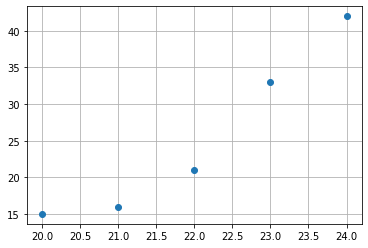

In [ ]:
plt.plot(x,y,'o') # 'o' 치면 점으로 표현
plt.grid()
plt.show()

In [ ]:
x

array([20, 21, 22, 23, 24])

In [ ]:
x.reshape(-1, 1)

array([[20],
       [21],
       [22],
       [23],
       [24]])

In [ ]:
model = LinearRegression()
model.fit( x.reshape(-1, 1), y) # x의 자료의 차원은 2차원이어야 합니다.
#x와 y를 선형회귀로 만들어주는 것

LinearRegression()

In [ ]:
print(model.coef_) #선형회귀계수, 기울기
print(model.intercept_) # 절편

[7.1]
-130.79999999999998


In [ ]:
model.score( x.reshape(-1, 1), y ) # 예측 정확도 = 91.8 %

0.9178805535324108

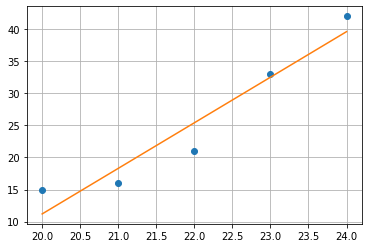

In [ ]:
plt.plot(x,y,'o') # 'o' 치면 점으로 표현
plt.plot(x,7.1*x + -130.8) # 회귀직선
plt.grid()
plt.show()

선형회귀는 그냥 선형적인 관계가 있냐 없냐먄 확인하기 용

In [ ]:
# 예측
def predict(x):
  return 7.1 * x + -130.8

In [ ]:
predict(30) # 온도 30도일때 판매량?

82.19999999999999

In [ ]:
# scikit-learn의 자체적인 predict()
model.predict([[30]]) # 입력값은 모형의 자료 차원과 동일해야함

array([82.2])

다중회귀

In [ ]:
np.random.seed(123)
x1 = np.random.randn(1000) * 50 #정규분포(randn)로부터 랜덤하게 1000개의 자료를 가져옴
x2 = np.random.randn(1000) * 50
y = 3.5 * x1 + 5 * x2 - 130 + np.random.randn(1000) * 50

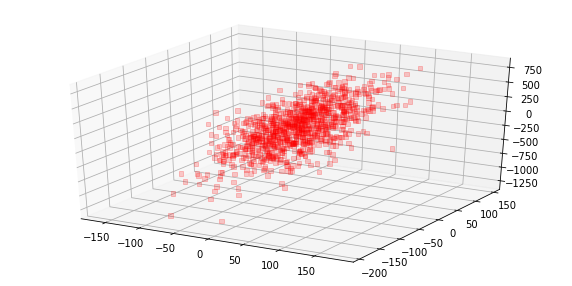

In [ ]:
# 다차원
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, marker=',', color='r', alpha=0.2)
plt.grid()
plt.show()

In [ ]:
two_d=pd.DataFrame(np.array([y,x1,x2]).T, columns=['y','x1','x2'])
two_d

,y,x1,x2
0,-595.903399,-54.281530,-37.441373
1,126.365269,49.867272,28.379736
2,153.871712,14.148925,35.907527
3,-600.394920,-75.314736,-49.969037
4,-188.548820,-28.930013,23.744916
...,...,...,...
995,188.742115,31.738157,42.285062
996,-270.054827,53.495930,-55.996126
997,-276.934807,-45.466351,-17.964836
998,-399.331767,23.513187,-80.484754


In [ ]:
model=LinearRegression()
model.fit(two_d[['x1','x2']],two_d['y'])

LinearRegression()

In [ ]:
#회귀계수
print(model.coef_)#베타값들
print(model.intercept_) #y절편

[3.4677746  4.98522671]
-129.5398972098281


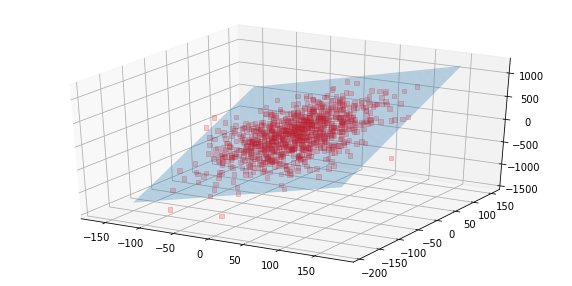

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, marker=',', color='r', alpha=0.2)

xx1 = np.tile(np.arange(-150, 150), (300,1))
xx2 = np.tile(np.arange(-150, 150), (300,1)).T

beta1 = model.coef_[0]
beta2 = model.coef_[1]
b = model.intercept_
yy = beta1 * xx1 + beta2 * xx2 + b
ax.plot_surface(xx1, xx2, yy, alpha=0.3)

plt.grid()
plt.show()

#변수 하나와 다른 점이라면, 변수 2개에서는 면으로 표현됨. 

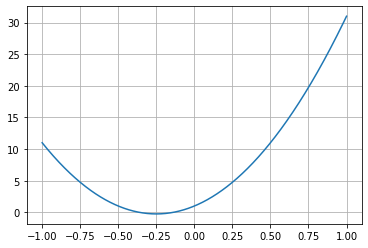

In [ ]:
#2차함수
x = np.linspace( -1, 1, 1000 )
y = 10 * x + 20 * x ** 2 + 1

plt.plot(x, y)
plt.grid()
plt.show()

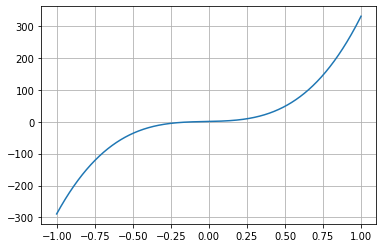

In [ ]:
# 3차함수
x = np.linspace( -1, 1, 1000 )
y = 10 * x + 20 * x ** 2 + 300 * x ** 3 + 1

plt.plot(x, y)
plt.grid()
plt.show()

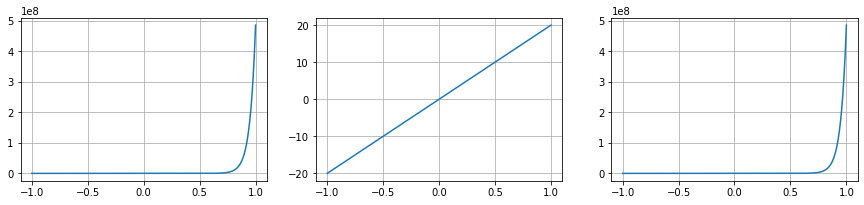

In [54]:
# 지수함수, 로그함수는 역함수관계
x = np.linspace( -1, 1, 1000 )
y = np.exp(20 * x)

plt.figure( figsize=(15, 3) )
plt.subplot( 1, 3, 1 )
plt.plot(x, y)
plt.grid()

y = np.log(y) # 지수함수에 로그모형 씌우면 선형모형 됨
plt.subplot( 1, 3, 2 )
plt.plot(x, y)
plt.grid()

y = np.exp(y) #선형모델에 지수모형 씌우기 -> 지수모형
plt.subplot( 1, 3, 3 )
plt.plot(x, y)
plt.grid()

plt.show()

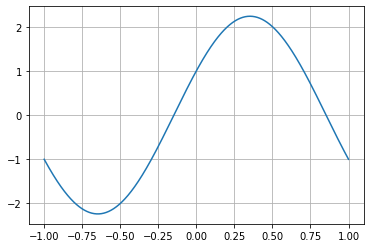

In [56]:
# 삼각함수
x = np.linspace( -1, 1, 1000 )
y = 1 * np.cos(np.pi * x) + 2 * np.sin( np.pi * x)

plt.plot(x, y)
plt.grid()
plt.show()

## 실습

In [57]:
np.random.seed(123)

x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x) + (np.random.randn(1000)/5)

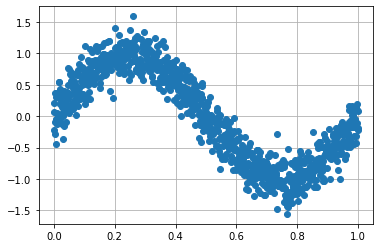

In [58]:
plt.plot( x, y ,'o')
plt.grid()
plt.show()

과적합
- train자료를 적게, test자료를 많이
(보통은 그 반대가 좋음 7:3, 8:2 정도)

In [60]:
np.random.seed(123)

x_train = np.linspace(0, 1, 10)
y_train = np.sin(2 * np.pi * x_train) + (np.random.randn(10)/5)

x_test = np.linspace(0, 1, 50)
y_test = np.sin(2 * np.pi * x_test) + (np.random.randn(50)/5)

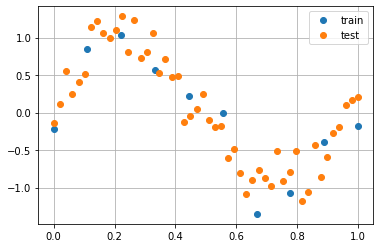

In [62]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.legend()
plt.grid()
plt.show()

###선형회귀 적용

In [65]:
#데이터 프레임으로 변경
train=pd.DataFrame(np.array([y_train ,x_train]).T, columns=['target','x'])
train

,target,x
0,-0.217126,0.000000
1,0.842257,0.111111
2,1.041403,0.222222
3,0.564766,0.333333
4,0.226300,0.444444
5,-0.011733,0.555556
6,-1.351361,0.666667
7,-1.070590,0.777778
8,-0.389600,0.888889
9,-0.173348,1.000000


In [66]:
test=pd.DataFrame(np.array([y_test ,x_test]).T, columns=['target','x'])
test

,target,x
0,-0.135777,0.000000
1,0.108935,0.020408
2,0.551933,0.040816
3,0.247487,0.061224
4,0.401921,0.081633
5,0.511240,0.102041
6,1.136869,0.122449
7,1.219189,0.142857
8,1.055954,0.163265
9,0.991650,0.183673


데이터프레임으로 변경하면 함수에 대입할 때 편함

In [67]:
# train 데이터프레임 이용해서 선형회귀모형 만들기
model = LinearRegression()
model.fit( train[['x']],train['target']) 

LinearRegression()

In [70]:
# 회귀계수
print(model.coef_)
print(model.intercept_)

[-1.35138446]
0.6217890078357454


In [71]:
# 학습정확도 -학습자료에 대해 얼마나 잘 설명하고 있는지 보여주는 정도
model.score(train[['x']],train['target']) #34% -> 잘 설명하지 못한다! 선형관계는 없군

0.3485544757102248

In [72]:
# 검증정확도 - 학습에 사용되지 않은 자료 이용해 정확도 확인, 예측력 좋은지 판단
model.score(test[['x']],test['target']) # 44% -> 선형적인 관계는 없는 것으로 판단됨

0.44221300473771785

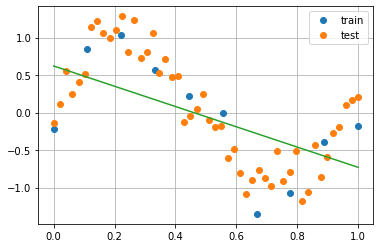

In [76]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot(x,model.predict(x.reshape(-1,1)))
plt.legend()
plt.grid()
plt.show()

###다항회귀 이용

####2차함수

In [79]:
# 그림 그리기 위한 자료만 추가로 데이터프레임 생성
df=pd.DataFrame(np.array([y,x]).T,columns=['target','x'])

In [82]:
# 2차항을 train 데이터프레임에 추가
train['x2']=train['x'] ** 2
train

,target,x,x2
0,-0.217126,0.000000,0.000000
1,0.842257,0.111111,0.012346
2,1.041403,0.222222,0.049383
3,0.564766,0.333333,0.111111
4,0.226300,0.444444,0.197531
5,-0.011733,0.555556,0.308642
6,-1.351361,0.666667,0.444444
7,-1.070590,0.777778,0.604938
8,-0.389600,0.888889,0.790123
9,-0.173348,1.000000,1.000000


In [83]:
test['x2']=test['x'] ** 2
test.head()

,target,x,x2
0,-0.135777,0.000000,0.000000
1,0.108935,0.020408,0.000416
2,0.551933,0.040816,0.001666
3,0.247487,0.061224,0.003748
4,0.401921,0.081633,0.006664


In [84]:
df['x2']=df['x'] ** 2
df.head()

,target,x,x2
0,-0.217126,0.000000,0.000000
1,0.205759,0.001001,0.000001
2,0.069174,0.002002,0.000004
3,-0.282392,0.003003,0.000009
4,-0.090565,0.004004,0.000016


In [85]:
#2차함수를 이용한 다항회귀
model=LinearRegression()
model.fit(train[['x','x2']],train['target'])

LinearRegression()

In [86]:
model.coef_ # 회귀계수 (매우 중요), 2차항은 설명력이 없다고 보여짐

array([-1.3799706 ,  0.02858614])

In [87]:
# 학습 정확도, 검증 정확도도 크게 다르진 않을듯
print(model.score(train[['x','x2']],train['target']))
print(model.score(test[['x','x2']],test['target']))

0.34856679877894303
0.442742788081522


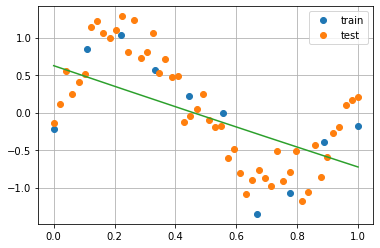

In [88]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot(df['x'],model.predict(df[['x','x2']]))
plt.legend()
plt.grid()
plt.show()

2차함수이지만 곡선의 형태가 안ㄴ나옴

####3차함수

In [89]:
# 3차항을 데이터프레임에 추가
train['x3']=train['x'] ** 3
train.head()

,target,x,x2,x3
0,-0.217126,0.000000,0.000000,0.000000
1,0.842257,0.111111,0.012346,0.001372
2,1.041403,0.222222,0.049383,0.010974
3,0.564766,0.333333,0.111111,0.037037
4,0.226300,0.444444,0.197531,0.087791


In [90]:
test['x3']=test['x'] ** 3
test.head()

,target,x,x2,x3
0,-0.135777,0.000000,0.000000,0.000000
1,0.108935,0.020408,0.000416,0.000008
2,0.551933,0.040816,0.001666,0.000068
3,0.247487,0.061224,0.003748,0.000229
4,0.401921,0.081633,0.006664,0.000544


In [91]:
df['x3']=df['x'] ** 3
df.head()

,target,x,x2,x3
0,-0.217126,0.000000,0.000000,0.000000e+00
1,0.205759,0.001001,0.000001,1.003006e-09
2,0.069174,0.002002,0.000004,8.024048e-09
3,-0.282392,0.003003,0.000009,2.708116e-08
4,-0.090565,0.004004,0.000016,6.419238e-08


In [96]:
#3차함수를 이용한 다항회귀
model=LinearRegression()
#model.fit(train[['x','x2','x3']],train['target'])
model.fit(train.loc[:,'x':],train['target'])

LinearRegression()

In [93]:
model.coef_ # 회귀계수

array([ 11.1331822 , -32.95076452,  21.98623377])

In [97]:
# 학습 정확도, 검증 정확도
# print(model.score(train[['x','x2','x3']],train['target']))
# print(model.score(test[['x','x2','x3']],test['target']))
print(model.score(train.loc[:,'x':],train['target']))
print(model.score(test.loc[:,'x':],test['target']))

0.8750448957834711
0.8814460302077375


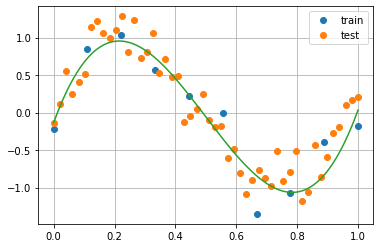

In [98]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot(df['x'],model.predict(df.loc[:,'x':]))
plt.legend()
plt.grid()
plt.show()

가장 ㅇ리반화된 형태의 모형 - BestFit(최적합)

#### 과적합

In [99]:
# 3차항을 데이터프레임에 추가
train['x4']=train['x'] ** 4
train['x5']=train['x'] ** 5
train['x6']=train['x'] ** 6
train['x7']=train['x'] ** 7
train['x8']=train['x'] ** 8
train['x9']=train['x'] ** 9
train.head()

,target,x,x2,x3,x4,x5,x6,x7,x8,x9
0,-0.217126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.842257,0.111111,0.012346,0.001372,0.000152,0.000017,0.000002,2.090752e-07,2.323057e-08,2.581175e-09
2,1.041403,0.222222,0.049383,0.010974,0.002439,0.000542,0.000120,2.676162e-05,5.947027e-06,1.321561e-06
3,0.564766,0.333333,0.111111,0.037037,0.012346,0.004115,0.001372,4.572474e-04,1.524158e-04,5.080526e-05
4,0.226300,0.444444,0.197531,0.087791,0.039018,0.017342,0.007707,3.425487e-03,1.522439e-03,6.766395e-04


In [100]:
test['x4']=test['x'] ** 4
test['x5']=test['x'] ** 5
test['x6']=test['x'] ** 6
test['x7']=test['x'] ** 7
test['x8']=test['x'] ** 8
test['x9']=test['x'] ** 9
test.head()

,target,x,x2,x3,x4,x5,x6,x7,x8,x9
0,-0.135777,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.108935,0.020408,0.000416,0.000008,1.734665e-07,3.540133e-09,7.224762e-11,1.474441e-12,3.009064e-14,6.140946e-16
2,0.551933,0.040816,0.001666,0.000068,2.775464e-06,1.132843e-07,4.623847e-09,1.887285e-10,7.703203e-12,3.144164e-13
3,0.247487,0.061224,0.003748,0.000229,1.405079e-05,8.602524e-07,5.266851e-08,3.224603e-09,1.974247e-10,1.208722e-11
4,0.401921,0.081633,0.006664,0.000544,4.440743e-05,3.625096e-06,2.959262e-07,2.415724e-08,1.972020e-09,1.609812e-10


In [101]:
df['x4']=df['x'] ** 4
df['x5']=df['x'] ** 5
df['x6']=df['x'] ** 6
df['x7']=df['x'] ** 7
df['x8']=df['x'] ** 8
df['x9']=df['x'] ** 9
df.head()

,target,x,x2,x3,x4,x5,x6,x7,x8,x9
0,-0.217126,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.205759,0.001001,0.000001,1.003006e-09,1.004010e-12,1.005015e-15,1.006021e-18,1.007028e-21,1.008036e-24,1.009045e-27
2,0.069174,0.002002,0.000004,8.024048e-09,1.606416e-11,3.216048e-14,6.438535e-17,1.288996e-19,2.580572e-22,5.166311e-25
3,-0.282392,0.003003,0.000009,2.708116e-08,8.132481e-11,2.442187e-13,7.333893e-16,2.202370e-18,6.613725e-21,1.986104e-23
4,-0.090565,0.004004,0.000016,6.419238e-08,2.570266e-10,1.029135e-12,4.120662e-15,1.649915e-17,6.606266e-20,2.645151e-22


In [102]:
#n차함수를 이용한 다항회귀
model=LinearRegression()
#model.fit(train[['x','x2','x3']],train['target'])
model.fit(train.loc[:,'x':],train['target'])

LinearRegression()

In [103]:
model.coef_ # 회귀계수, 과적합 현상) 105,-226 등등 화귀계수가 과하게 추정됨

array([ 1.05037522e+02, -2.26180928e+03,  2.13602586e+04, -1.07407073e+05,
        3.12668029e+05, -5.43220993e+05,  5.54458361e+05, -3.06230591e+05,
        7.05288240e+04])

In [106]:
# 학습 정확도, 검증 정확도 
print(model.score(train.loc[:,'x':],train['target'])) # train 적합도는 100프로지만
print(model.score(test.loc[:,'x':],test['target'])) # 과적합 현상) test 적합도는 0에 가까움(원래 음수가 나오면 안됨), 검증 자료들에 대한 설명력이 약함

1.0
-0.09517580984249774


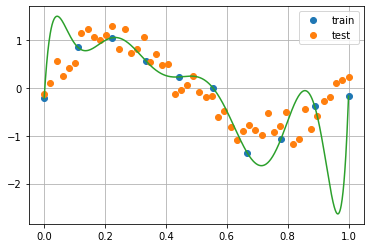

In [105]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot(df['x'],model.predict(df.loc[:,'x':]))
plt.legend()
plt.grid()
plt.show()

# 최적화

In [107]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

## 가능도 함수

In [116]:
# 가능도 함수
from scipy.stats import norm

# 표준편차는 샘플의 표준편차를 그대로 사용
# 각 확률의 곱
# 각 줄은 주어진 x에서 y가 될 확률이라는 뜻
sigma = np.sqrt( np.var(y) )
norm( loc= 1 * x[0] + 2, scale = sigma ).pdf(y[0]) * \
norm( loc= 1 * x[1] + 2, scale = sigma ).pdf(y[1]) * \
norm( loc= 1 * x[2] + 2, scale = sigma ).pdf(y[2]) * \
norm( loc= 1 * x[3] + 2, scale = sigma ).pdf(y[3]) * \
norm( loc= 1 * x[4] + 2, scale = sigma ).pdf(y[4]) 

#확률들의 곱이기 때문에 가능도 값이 0에 가까운 수가 될 수밖에 없음
# 따라서 다른 방법을 사용하게 됨 -> log 씌우기~

1.1441818390065927e-08

## Maximun Log Likelihood
- 확률값들의 곱에 로그 씌우기

In [118]:
sigma = np.sqrt( np.var(y) )
np.log(norm( loc= 1 * x[0] + 2, scale = sigma ).pdf(y[0])) + \
np.log(norm( loc= 1 * x[1] + 2, scale = sigma ).pdf(y[1])) + \
np.log(norm( loc= 1 * x[2] + 2, scale = sigma ).pdf(y[2])) + \
np.log(norm( loc= 1 * x[3] + 2, scale = sigma ).pdf(y[3])) + \
np.log(norm( loc= 1 * x[4] + 2, scale = sigma ).pdf(y[4]) )


-18.285990913445413

## Maximun Log Likelihood
- 마이너스 로그값의 합

## 실습

In [119]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

In [120]:
sigma = np.sqrt( np.var(y) ) # 분산의 제곱근

def L(beta): # 최적화 추정
  likelihood = norm( beta[1] * x + beta[0], sigma).pdf(y)
  return np.sum(-np.log(likelihood))

In [122]:
from scipy.optimize import minimize

In [123]:
beta = np.array([0, 0])
result = minimize( L, beta )
result.x

array([-130.80034496,    7.10001519])